**This notebook includes:**

Part1:

Cubic interpolation

Part2:

a) Fletcher-Reeves CG Method.

b) Marquardt Method.

c) Quasi-Newton Method.

The rest of the methods are implemented using matlab

imports

In [ ]:
import math
from scipy import optimize
from autograd import grad, hessian
import numpy as np

# **Cubic**

In [ ]:
def cubic(func, t, error=0.001):
    df = grad(func)
    A = 0
    B = t

    f_a = func(A)
    df_a = df(float(A))
    df_b = df(float(B))
    df_lambda = math.inf

    while df_b < 0:
      B = 2*B
      df_b = df(float(B))
    f_b = func(B)
    i = 0

    while True:
      if i > 0:
        if df_lambda > 0:
            B = lambda_star
            f_b = func(B)
            df_b = df_lambda
        else:
            A = lambda_star
            f_a = func(A)
            df_a = df_lambda

      Z=3*(f_a-f_b)/(B-A)+df_a+df_b
      Q=math.sqrt(Z**2-df_a*df_b)
      lambda_star=A+(df_a+Z+Q)/(df_a+df_b+2*Z)*(B-A)

      if lambda_star < 0:
        lambda_star = A + (df_a+Z-Q)/(df_a+df_b+2*Z)*(B-A)

      df_lambda = df(float(lambda_star))
      #i += 1
      if abs(df_lambda) <= error:
        break

    return lambda_star,func(lambda_star)

In [ ]:
Function = lambda x:  x**5 - 5*x**3 - 20*x +5
t = 0.25
error = 0.001

In [ ]:
lambda_star,value = cubic(Function, t, error)
print("X ""(optimum solution) is")
print(lambda_star)
print("optimum function value is:")
print(value)

X (optimum solution) is
2.0
optimum function value is:
-43.0


In [ ]:
print("Python function:")
print(optimize.minimize_scalar(Function))

Python function:
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -42.99999999999999
       x: 2.0000000140627363
     nit: 9
    nfev: 12


# **Part 2**

a) Fletcher-Reeves CG Method.

b) Marquardt Method.

c) Quasi-Newton Method.

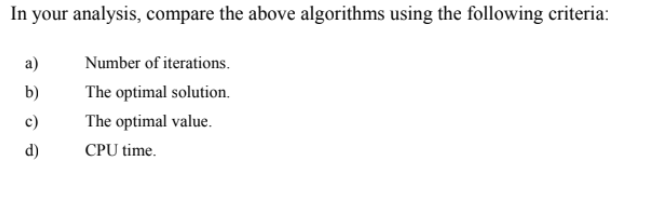

# **Fletcher reeves**

In [ ]:
from scipy.optimize import minimize_scalar
def fletcher_reeves(Function, x1, e):
    s0=np.zeros(x1.shape[0])
    gradf=grad(Function)
    grad_f1 =gradf(x1, 0, s0)
    s1= -grad_f1
    i = 1
    xi = x1
    si = s1
    grad_fi = grad_f1
    #condition=np.linalg.norm(grad_fi)
    while  np.linalg.norm(grad_fi) > e:
        Problem = lambda lambda_sta: Function(xi,lambda_sta,si)
        lambda_star = minimize_scalar(Problem, method='golden').x
        xi1 = xi
        xi = xi1 + lambda_star*si
        gi = np.linalg.norm(gradf(xi, 0, s0))**2
        gi1 = np.linalg.norm(gradf(xi1, 0, s0))**2
        beta_i = gi/gi1
        si1 = si
        grad_fi = gradf(xi, 0, s0)
        si=-1*grad_fi+beta_i*si1
        i = i+1
    fun=Function(xi, 0, s0)
    print(f'Number of iterations is')
    print(i-1)

    return xi, fun


# **Marquardt**

In [ ]:
def Marquardt(Function, x1, c1, c2,alpha,e):
    s0=np.zeros(x1.shape[0])
    gradf=grad(Function)
    grad_f1 =gradf(x1, 0, s0)
    A=hessian(Function)
    I=np.identity(x1.shape[0])
    s1=-1*np.dot(np.linalg.inv(A(x1, 0, s0)+I*alpha),grad_f1)
    i = 1
    xi = x1
    si = s1
    grad_fi=grad_f1
    while np.linalg.norm(grad_fi) > e:
        f_i1= Function(xi,0,s0)
        Problem = lambda lambda_sta: Function(xi,lambda_sta,si)
        lambda_star = minimize_scalar(Problem, method='golden').x
        xi1 = xi
        xi = xi1 + lambda_star*si
        f_i2= Function(xi,0,s0)
        if f_i1 > f_i2:
            alpha = c1*alpha
        else:
            alpha = c2*alpha
        grad_fi=gradf(xi, 0, s0)
        si=-1*np.dot(np.linalg.inv(A(xi, 0, s0)+alpha*I),grad_fi )
        i +=1

    fun=Function(xi, 0, s0)
    print(f'Number of iterations is')
    print(i-1)

    return xi, fun


# **Quasi_newton**

In [ ]:
def Quasi_newton(Function, x1, e):
    s0=np.zeros(x1.shape[0])
    gradf=grad(Function)
    grad_f1 =gradf(x1, 0, s0)
    I=np.identity(x1.shape[0])
    H1=I

    Hi = H1
    s1 =-np.dot(Hi,grad_f1)
    i = 1
    xi = x1
    si = s1
    grad_fi=grad_f1

    while np.linalg.norm(grad_fi) > e:
        fi= Function(xi,0,s0)
        Problem = lambda lambda_sta: Function(xi,lambda_sta,si)
        lambda_star = minimize_scalar(Problem, method='golden').x
        xi1 = xi
        xi = xi1 + lambda_star*si
        grad_i1 = grad_fi
        grad_fi = gradf(xi, 0, s0)
        yi= grad_fi - grad_i1
        S=xi-xi1
        y_transpose=yi.T
        S_transpose=S.T
        t1 = I - np.outer(S,yi)/np.dot(y_transpose,S)
        t2 = I - np.outer(yi,S)/np.dot(y_transpose,S)
        t3 = np.dot(S,S_transpose)/np.dot(y_transpose,S)
        Hi= np.dot(np.dot(t1, Hi), t2) + t3
        si = -1*np.dot(Hi,grad_fi)
        i += 1
    fun=Function(xi, 0, s0)
    print(f'Number of iterations is')
    print(i-1)

    return xi, fun

# **Testing:**

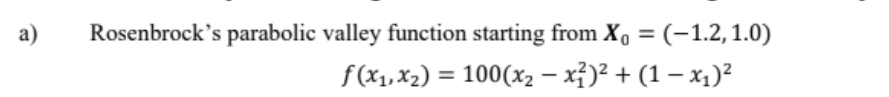

In [ ]:
def Function(x,alpha,s):
    return 100*((x[1]+alpha*s[1])-(x[0]+alpha*s[0])**2)**2 + (1-(x[0]+alpha*s[0]))**2

In [ ]:
import time


x1 = np.array([-1.2, 1])
e = 0.001


# Fletcher-Revees Method
print('-----------------------------------------------------')
print("The Fletcher-Reeves CG Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= fletcher_reeves(Function, x1, e)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)
# Fletcher-Revees Method
print('\n')
print('-----------------------------------------------------')
print("Marquardt Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= Marquardt(Function, x1, c1=0.5, c2=2,alpha=2e4, e=1e-3)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)
# Fletcher-Revees Method

print('\n')
print('-----------------------------------------------------')
print("Quasi-Newton Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= Quasi_newton(Function, x1, e)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)


-----------------------------------------------------
The Fletcher-Reeves CG Method.
-----------------------------------------------------
Number of iterations is
114


The optimal solution is:
[1.00020729 1.00041751]


Solution Function Value:
4.380354894594454e-08


CPU time is :
3525.1902842521667


-----------------------------------------------------
Marquardt Method.
-----------------------------------------------------
Number of iterations is
19


The optimal solution is:
[1.00001608 1.00003394]


Solution Function Value:
5.724003474507518e-10


CPU time is :
3525.321063518524


-----------------------------------------------------
Quasi-Newton Method.
-----------------------------------------------------
Number of iterations is
20


The optimal solution is:
[0.99998829 0.99997647]


Solution Function Value:
1.3837468296469095e-10


CPU time is :
3525.3665521144867


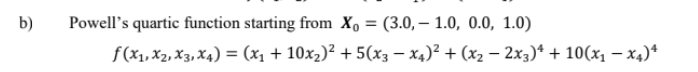

In [ ]:
def Function(x,alpha,s):
      #x1:x[0]+alpha*s[0]
     #x2:x[1]+alpha*s[1]
     #x3:x[2]+alpha*s[2]
     #x4:x[3]+alpha*s[3])
     return ((x[0]+alpha*s[0])+(10*(x[1]+alpha*s[1])))**2 + 5*((x[2]+alpha*s[2])-(x[3]+alpha*s[3]))**2 +((x[1]+alpha*s[1])-2*(x[2]+alpha*s[2]))**4+ 10*((x[0]+alpha*s[0])-(x[3]+alpha*s[3]))**4

In [ ]:
import time


x1 = np.array([3.0, -1.0, 0.0, 1.0])
e = 0.001


# Fletcher-Revees Method
print('-----------------------------------------------------')
print("The Fletcher-Reeves CG Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= fletcher_reeves(Function, x1, e)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)
# Fletcher-Revees Method
print('\n')
print('-----------------------------------------------------')
print("Marquardt Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= Marquardt(Function, x1, c1=0.5, c2=2,alpha=2e4, e=1e-3)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)
# Fletcher-Revees Method

print('\n')
print('-----------------------------------------------------')
print("Quasi-Newton Method.")
print('-----------------------------------------------------')
t1 = time.time()
Solution= Quasi_newton(Function, x1, e)
t = time.time()-t0
print('\n')
print(f'The optimal solution is:')
print(Solution[0])
print('\n')
print(f'Solution Function Value:')
print(Solution[1])
print('\n')
print(f'CPU time is :')
print(t)


-----------------------------------------------------
The Fletcher-Reeves CG Method.
-----------------------------------------------------
Number of iterations is
159


The optimal solution is:
[ 0.02625296 -0.00262915  0.01322802  0.01326136]


Solution Function Value:
1.0075409195853434e-06


CPU time is :
3526.360357761383


-----------------------------------------------------
Marquardt Method.
-----------------------------------------------------
Number of iterations is
25


The optimal solution is:
[ 0.00715196 -0.00071912  0.00356361  0.00356377]


Solution Function Value:
6.988409484158134e-09


CPU time is :
3526.8572397232056


-----------------------------------------------------
Quasi-Newton Method.
-----------------------------------------------------
Number of iterations is
24


The optimal solution is:
[-0.0035206   0.00035138 -0.00825869 -0.00829964]


Solution Function Value:
9.461870067401848e-08


CPU time is :
3526.986481189728
